<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/rahatalberuni/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Section 1

In [9]:
!pip install scipy
###############################################################################
# Section 1: Imports and Module Docstring
###############################################################################
"""
This script calculates the natural (eigen) frequencies for a system of 3 masses
connected by 5 springs using two approaches:
1. Provided Code: A single function that constructs the matrices and solves the
   eigenvalue problem.
2. Extended Code: The problem is broken into separate sections with functions
   to form the mass matrix, stiffness matrix, and solve the eigenvalue problem.

Both approaches assume the following layout:

    Wall -- k1 -- m1 -- k2 -- m2 -- k3 -- m3 -- k4 -- Wall
                   |__________ k5 __________|

The script prints out:
- The mass matrix,
- The stiffness matrix,
- The eigenfrequencies from both methods,
and compares the results.
"""

import numpy as np
import scipy.linalg as la # Changed import to use scipy.linalg


###############################################################################
# Section 2: Provided Code Implementation
###############################################################################
def calculate_eigenfrequencies_provided(m1, m2, m3, k1, k2, k3, k4, k5):
    """
    Calculate eigenfrequencies using a single function implementation.

    Parameters
    ----------
    m1, m2, m3 : float
        Masses for the three-mass system (kg).
    k1, k2, k3, k4, k5 : float
        Spring constants (N/m). k1 and k4 connect to the walls; k2 and k3
        connect the masses in series; k5 connects mass 1 and mass 3 directly.

    Returns
    -------
    M : numpy.ndarray
        The 3x3 mass matrix.
    K : numpy.ndarray
        The 3x3 stiffness matrix.
    frequencies : numpy.ndarray
        1D array of natural frequencies (rad/s) sorted in ascending order.
    """
    # Form the mass matrix (diagonal)
    M = np.diag([m1, m2, m3])

    # Form the stiffness matrix according to the assumed connections
    K = np.array([
        [ k1 + k2 + k5,         -k2,         -k5 ],
        [         -k2,    k2 + k3,         -k3 ],
        [         -k5,         -k3,  k3 + k4 + k5]
    ], dtype=float)

    # Solve the generalized eigenvalue problem: K x = λ M x, where λ = ω^2
    # Using scipy.linalg.eig for generalized eigenvalue problem
    eigenvals, _ = la.eig(K, b=M) # Changed la.eig(K, M) to la.eig(K, b=M)
    eigenvals = np.real(eigenvals)
    idx_sorted = np.argsort(eigenvals)
    eigenvals_sorted = eigenvals[idx_sorted]
    frequencies = np.sqrt(eigenvals_sorted)

    return M, K, frequencies


###############################################################################
# Section 3: Extended Code Implementation
###############################################################################
def form_mass_matrix(m1, m2, m3):
    """
    Create the 3x3 mass matrix for the three-mass system.

    Parameters
    ----------
    m1, m2, m3 : float
        Masses (kg).

    Returns
    -------
    M : numpy.ndarray
        Diagonal mass matrix.
    """
    M = np.diag([m1, m2, m3])
    return M

def form_stiffness_matrix(k1, k2, k3, k4, k5):
    """
    Create the 3x3 stiffness matrix for the system.

    Parameters
    ----------
    k1, k2, k3, k4, k5 : float
        Spring constants (N/m).

    Returns
    -------
    K : numpy.ndarray
        Stiffness matrix.
    """
    K = np.array([
        [ k1 + k2 + k5,         -k2,         -k5 ],
        [         -k2,    k2 + k3,         -k3 ],
        [         -k5,         -k3,  k3 + k4 + k5]
    ], dtype=float)
    return K

def solve_eigenproblem(K, M):
    """
    Solve the generalized eigenvalue problem K x = λ M x.

    Parameters
    ----------
    K : numpy.ndarray
        Stiffness matrix.
    M : numpy.ndarray
        Mass matrix.

    Returns
    -------
    frequencies : numpy.ndarray
        Natural frequencies (rad/s) sorted in ascending order.
    """
    # Using scipy.linalg.eig for generalized eigenvalue problem
    eigenvals, _ = la.eig(K, b=M) # Changed la.eig(K, M) to la.eig(K, b=M)
    eigenvals = np.real(eigenvals)
    idx_sorted = np.argsort(eigenvals)
    eigenvals_sorted = eigenvals[idx_sorted]
    frequencies = np.sqrt(eigenvals_sorted)
    return frequencies

def extended_solution(m1, m2, m3, k1, k2, k3, k4, k5):
    """
    Compute the mass matrix, stiffness matrix, and eigenfrequencies using the
    extended code structure.

    Parameters
    ----------
    m1, m2, m3 : float
        Masses (kg).
    k1, k2, k3, k4, k5 : float
        Spring constants (N/m).

    Returns
    -------
    M : numpy.ndarray
        Mass matrix.
    K : numpy.ndarray
        Stiffness matrix.
    frequencies : numpy.ndarray
        Eigenfrequencies (rad/s).
    """
    M = form_mass_matrix(m1, m2, m3)
    K = form_stiffness_matrix(k1, k2, k3, k4, k5)
    frequencies = solve_eigenproblem(K, M)
    return M, K, frequencies


###############################################################################
# Section 4: Main Function to Compare Implementations
###############################################################################
def main():
    """
    Main function to run both the provided and extended implementations,
    print the mass and stiffness matrices, and compare the computed eigenfrequencies.
    """
    # Define parameters for masses and spring constants
    m1 = 1.0   # kg
    m2 = 1.0   # kg
    m3 = 1.0   # kg
    k1 = 100.0 # N/m (wall to m1)
    k2 = 200.0 # N/m (m1 to m2)
    k3 = 300.0 # N/m (m2 to m3)
    k4 = 100.0 # N/m (m3 to wall)
    k5 = 50.0  # N/m (extra spring from m1 to m3)

    # --- Provided Code Implementation ---
    M_provided, K_provided, freqs_provided = calculate_eigenfrequencies_provided(m1, m2, m3, k1, k2, k3, k4, k5)

    # --- Extended Code Implementation ---
    M_extended, K_extended, freqs_extended = extended_solution(m1, m2, m3, k1, k2, k3, k4, k5)

    # Display the results:
    print("==== Provided Code Implementation ====")
    print("\nMass Matrix (M):")
    print(M_provided)
    print("\nStiffness Matrix (K):")
    print(K_provided)
    print("\nEigenfrequencies (rad/s):")
    for i, f in enumerate(freqs_provided, start=1):
        print(f"  ω{i} = {f:.4f}")

    print("\n==== Extended Code Implementation ====")
    print("\nMass Matrix (M):")
    print(M_extended)
    print("\nStiffness Matrix (K):")
    print(K_extended)
    print("\nEigenfrequencies (rad/s):")
    for i, f in enumerate(freqs_extended, start=1):
        print(f"  ω{i} = {f:.4f}")

    # Compare the eigenfrequencies
    print("\n==== Comparison of Eigenfrequencies ====")
    if np.allclose(freqs_provided, freqs_extended):
        print("Both implementations produce identical eigenfrequencies.")
    else:
        print("The implementations produce different eigenfrequencies.")

    # Optionally, you could also compare the matrices
    if np.allclose(M_provided, M_extended) and np.allclose(K_provided, K_extended):
        print("Both implementations produce identical mass and stiffness matrices.")
    else:
        print("The mass and/or stiffness matrices differ between implementations.")


if __name__ == "__main__":
    main()

==== Provided Code Implementation ====

Mass Matrix (M):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Stiffness Matrix (K):
[[ 350. -200.  -50.]
 [-200.  500. -300.]
 [ -50. -300.  450.]]

Eigenfrequencies (rad/s):
  ω1 = 7.9683
  ω2 = 20.7167
  ω3 = 28.4134

==== Extended Code Implementation ====

Mass Matrix (M):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Stiffness Matrix (K):
[[ 350. -200.  -50.]
 [-200.  500. -300.]
 [ -50. -300.  450.]]

Eigenfrequencies (rad/s):
  ω1 = 7.9683
  ω2 = 20.7167
  ω3 = 28.4134

==== Comparison of Eigenfrequencies ====
Both implementations produce identical eigenfrequencies.
Both implementations produce identical mass and stiffness matrices.


# Section 2: AI Creativity


*   The first trail code after the prompt without damping. I was surprised that it added a graph
   



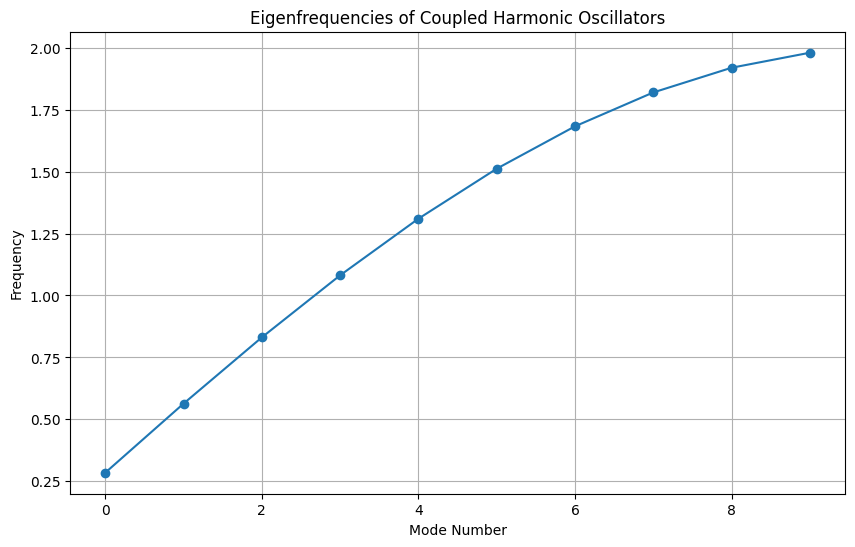

array([0.28462968, 0.56346511, 0.83083003, 1.08128163, 1.30972147,
       1.51149915, 1.68250707, 1.81926399, 1.91898595, 1.97964288])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of masses
m = 1.0  # Mass of each oscillator
k = 1.0  # Spring constant

# Construct the matrix for the system
A = np.zeros((N, N))

# Fill the matrix according to the coupling
for i in range(N):
    A[i, i] = 2 * k / m  # Diagonal elements
    if i > 0:
        A[i, i-1] = -k / m  # Coupling to the left neighbor
    if i < N - 1:
        A[i, i+1] = -k / m  # Coupling to the right neighbor

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Calculate eigenfrequencies
frequencies = np.sqrt(np.abs(eigenvalues))

# Sort frequencies
frequencies = np.sort(frequencies)

# Plot the eigenfrequencies
plt.figure(figsize=(10, 6))
plt.plot(frequencies, 'o-')
plt.title('Eigenfrequencies of Coupled Harmonic Oscillators')
plt.xlabel('Mode Number')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Output the frequencies
frequencies

## AI suggest should he use damping constant or not, I told to modify the code using damping constant


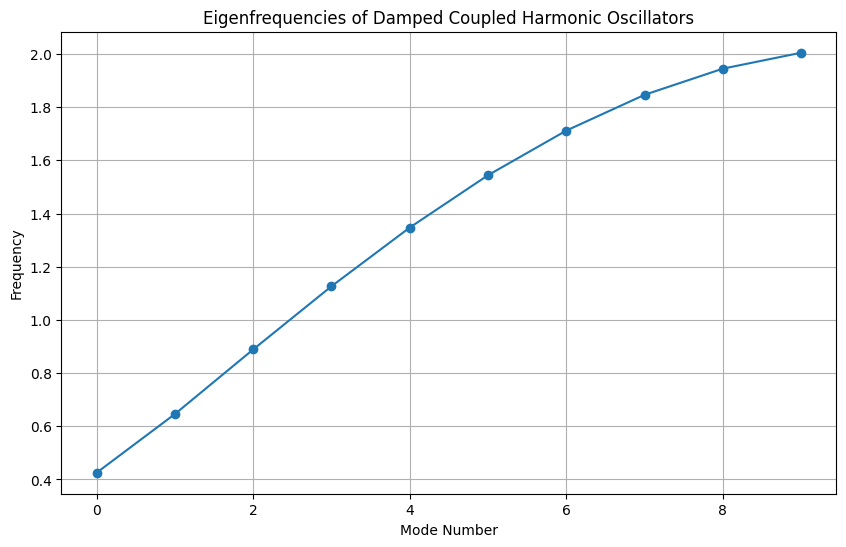

array([0.42545746, 0.64613693, 0.88897611, 1.12657444, 1.34735679,
       1.54422462, 1.71196671, 1.84654311, 1.94486685, 2.00474087])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of masses
m = 1.0  # Mass of each oscillator
k = 1.0  # Spring constant
gamma = 0.1  # Damping coefficient

# Construct the matrix for the system
A = np.zeros((N, N))

# Fill the matrix according to the coupling and damping
for i in range(N):
    A[i, i] = (2 * k / m) + (gamma / m)  # Diagonal elements with damping
    if i > 0:
        A[i, i-1] = -k / m  # Coupling to the left neighbor
    if i < N - 1:
        A[i, i+1] = -k / m  # Coupling to the right neighbor

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Calculate eigenfrequencies (considering damping)
frequencies = np.sqrt(np.abs(eigenvalues))

# Sort frequencies
frequencies = np.sort(frequencies)

# Plot the eigenfrequencies
plt.figure(figsize=(10, 6))
plt.plot(frequencies, 'o-')
plt.title('Eigenfrequencies of Damped Coupled Harmonic Oscillators')
plt.xlabel('Mode Number')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Output the frequencies
frequencies